<a href="https://colab.research.google.com/github/EMcoding17/ExtraccionConocimientosDeBD/blob/main/Actividad05/Hongos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación del CSV mushrroms**

## **Extraccion de conocimientos de base de datos**
## **Romero Sosa Emma Yuridia**
## **IDGS 91** 


---



## **Importar librerias**

In [81]:
import numpy as np
import pandas as pd
#librerias para crear graficos
import matplotlib.pyplot as plt
import seaborn as sns
#Asignar estilo a graficos de seaborns
sns.set_theme(style="darkgrid", palette="Spectral")

#libreria para convertir feautes a labels
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## **Cargar dataset**

In [82]:
#Cargar dataset desde github
!wget https://raw.githubusercontent.com/EMcoding17/ExtraccionConocimientosDeBD/main/Actividad05/mushrooms.csv
df = pd.read_csv("mushrooms.csv",delimiter=',',header='infer')

--2021-11-14 20:32:55--  https://raw.githubusercontent.com/EMcoding17/ExtraccionConocimientosDeBD/main/Actividad05/mushrooms.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 374003 (365K) [text/plain]
Saving to: ‘mushrooms.csv.2’

mushrooms.csv.2     100%[===================>] 365.24K  --.-KB/s    in 0.005s  

2021-11-14 20:32:55 (72.4 MB/s) - ‘mushrooms.csv.2’ saved [374003/374003]



In [83]:
#Mostrar forma del dataframe
df.shape

(8124, 23)

In [84]:
#Mostrar los primeros 5 registros
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [85]:
#Mostrar los ultimos 5 registros
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


In [86]:
#Mostrar la información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# **Limpieza de Datos**

In [87]:
#Obtener la suma de los datos faltantes de cada columna
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [88]:
#Verificar que no haya datos duplicados dentro del dataframe
df.duplicated().sum()

0

# **Clasificación**

In [89]:
# Función para conocer los valores unicos de las columnas.
def uniqueData(dataframe, col):
  # Obtener todos los valores unicos en la columna
  lista_unica = df[col].unique()

  # Ordenar alfabeticamente y mostrar datos
  lista_unica.sort()
  print("Columna: ", col)
  print("No. columnas unicas: ", lista_unica.size)
  print("Valores unicos: ", lista_unica)

In [90]:
#Mostrar valores unicos de cada columna
for i in (df):
  uniqueData(df, i)

Columna:  class
No. columnas unicas:  2
Valores unicos:  ['e' 'p']
Columna:  cap-shape
No. columnas unicas:  6
Valores unicos:  ['b' 'c' 'f' 'k' 's' 'x']
Columna:  cap-surface
No. columnas unicas:  4
Valores unicos:  ['f' 'g' 's' 'y']
Columna:  cap-color
No. columnas unicas:  10
Valores unicos:  ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
Columna:  bruises
No. columnas unicas:  2
Valores unicos:  ['f' 't']
Columna:  odor
No. columnas unicas:  9
Valores unicos:  ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
Columna:  gill-attachment
No. columnas unicas:  2
Valores unicos:  ['a' 'f']
Columna:  gill-spacing
No. columnas unicas:  2
Valores unicos:  ['c' 'w']
Columna:  gill-size
No. columnas unicas:  2
Valores unicos:  ['b' 'n']
Columna:  gill-color
No. columnas unicas:  12
Valores unicos:  ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
Columna:  stalk-shape
No. columnas unicas:  2
Valores unicos:  ['e' 't']
Columna:  stalk-root
No. columnas unicas:  5
Valores unicos:  ['?' 'b' 'c' 'e' 'r']
Column

## **Convertir columnas a categoricas**

In [91]:
#Convertir columnas como tipo categorico 
columns = df.columns
df[columns] = df[columns].astype('category')

In [92]:
#Verificar cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

## **Preparar categorias**

In [93]:
#Transformar columnas categoricas a numericas
encoder = OrdinalEncoder()
encoder.fit(df[columns])
df[columns] = encoder.transform(df[columns])

In [94]:
#Verificar cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     8124 non-null   float64
 1   cap-shape                 8124 non-null   float64
 2   cap-surface               8124 non-null   float64
 3   cap-color                 8124 non-null   float64
 4   bruises                   8124 non-null   float64
 5   odor                      8124 non-null   float64
 6   gill-attachment           8124 non-null   float64
 7   gill-spacing              8124 non-null   float64
 8   gill-size                 8124 non-null   float64
 9   gill-color                8124 non-null   float64
 10  stalk-shape               8124 non-null   float64
 11  stalk-root                8124 non-null   float64
 12  stalk-surface-above-ring  8124 non-null   float64
 13  stalk-surface-below-ring  8124 non-null   float64
 14  stalk-co

In [95]:
#Mostrar los primeros 5 registros
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,3.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0.0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,2.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,2.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,1.0,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,3.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,0.0,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,3.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0


In [96]:
#Mostrar valores unicos de cada columna
i = 0
for i in (df):
  uniqueData(df, i)

Columna:  class
No. columnas unicas:  2
Valores unicos:  [0. 1.]
Columna:  cap-shape
No. columnas unicas:  6
Valores unicos:  [0. 1. 2. 3. 4. 5.]
Columna:  cap-surface
No. columnas unicas:  4
Valores unicos:  [0. 1. 2. 3.]
Columna:  cap-color
No. columnas unicas:  10
Valores unicos:  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Columna:  bruises
No. columnas unicas:  2
Valores unicos:  [0. 1.]
Columna:  odor
No. columnas unicas:  9
Valores unicos:  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
Columna:  gill-attachment
No. columnas unicas:  2
Valores unicos:  [0. 1.]
Columna:  gill-spacing
No. columnas unicas:  2
Valores unicos:  [0. 1.]
Columna:  gill-size
No. columnas unicas:  2
Valores unicos:  [0. 1.]
Columna:  gill-color
No. columnas unicas:  12
Valores unicos:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
Columna:  stalk-shape
No. columnas unicas:  2
Valores unicos:  [0. 1.]
Columna:  stalk-root
No. columnas unicas:  5
Valores unicos:  [0. 1. 2. 3. 4.]
Columna:  stalk-surface-above-ring
No. columnas unic

## **Valores estadisticos**

In [97]:
# Mostrar los valores estadisticos de cada columna
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


## **Correlación**

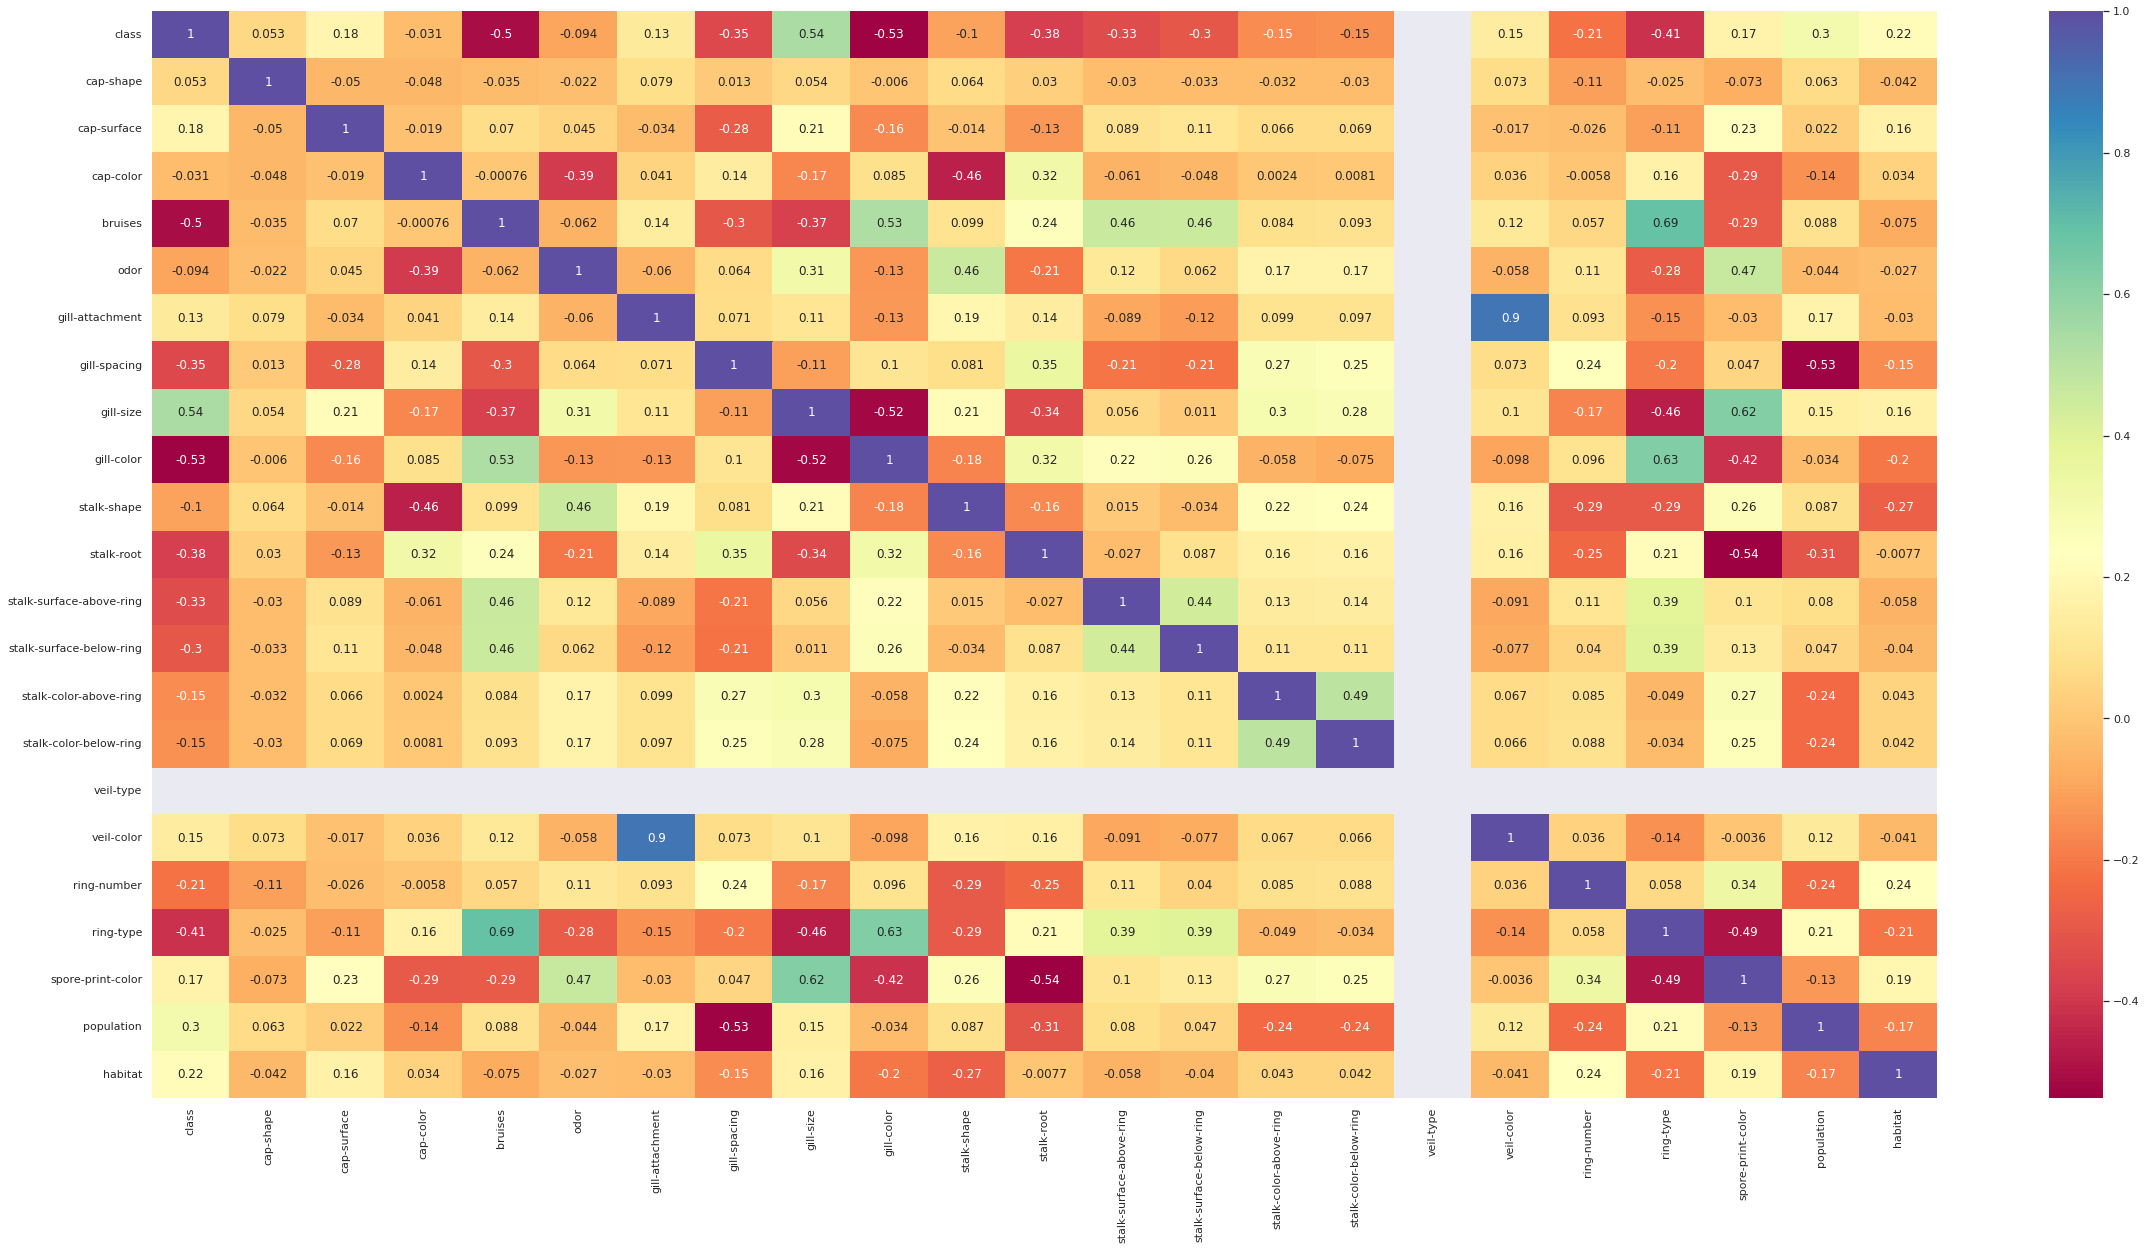

In [98]:
#Mostrar la correlacion del dataframe en un heatmap
#HEATMAP
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(), cmap="Spectral", annot=True)
plt.show()

## **Correlacion con columna class**

In [99]:
#Trabajar con la columna class
y = df['class']
y

0       1.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
8119    0.0
8120    0.0
8121    0.0
8122    1.0
8123    0.0
Name: class, Length: 8124, dtype: float64

In [100]:
#Ordenar de manera descendente los valores de corelación
corr = df.corr()

corr['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

# **Modelo de clasificación**

## **Seleccionar caracteristicas**

In [101]:
x = df[['gill-size', 'population', 'habitat', 'cap-surface', 'spore-print-color', 'veil-color', 'cap-shape' ]]
y = df['class']

## **Configurar Modelo de Clasificación**



In [102]:
model = KNeighborsClassifier(n_neighbors=5)

## **Dividir el dataframe en test y train**

In [103]:
#Separar datos para entrenar y testear el modelo
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=1234)
print(x_train.count())
print(x_test.count())

gill-size            6499
population           6499
habitat              6499
cap-surface          6499
spore-print-color    6499
veil-color           6499
cap-shape            6499
dtype: int64
gill-size            1625
population           1625
habitat              1625
cap-surface          1625
spore-print-color    1625
veil-color           1625
cap-shape            1625
dtype: int64


## **Entrenar modelo**

In [104]:

# Ajustar el modelo de regresion lineal para entrenar
model.fit(x_train,y_train)
print (model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


## **Predecir clases**

In [105]:
#Predecir con el modelo
y_hat = model.predict(x_test)
acc = accuracy_score(y_test, y_hat)
cl = classification_report(y_test, y_hat)
matriz_conf = confusion_matrix(y_test, y_hat)

print("Precisión del:", acc, "\nReporte de clasificación:\n",cl,"\nMatriz de confusión:\n",matriz_conf)

Precisión del: 0.9846153846153847 
Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       817
         1.0       0.98      0.99      0.98       808

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625
 
Matriz de confusión:
 [[800  17]
 [  8 800]]



---

## **Conclusión**

En machine learning el uso de datos numericos es muy importante pero tambien es importante tener en consideración los datos categoricos, por ello esta actividad se baso en la transformación de datos categoricos a numericos. Al hacer esta transformación podemos darnos cuenta que podemos mejorar el entrenamiento de un modelo al hacer esta transformacion y clasificación de los datos.